# Metis Introduction to Data Science Course Project
## Felipe Rios Ribeiro

### What is the question you hope to answer?

I selected a challenge from Kaggle named "House Prices - Advanced Regression Techniques", available at https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview.

#### How might we predict house prices using key data and features from houses such as area, age, location, style, condition, etc.

### What data are you planning to use to answer that question?

The available data for this challenge can be found here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

1. Train.csv 

2. Test.csv

### Steps

* Import data and libraries
* Understand Train and Test datasets
* Cleaning
* Understand Sale Price (target variable)
* Remove missing values from Train
* Determine the most important variables for Sale Price (correlation)
* Run a multi-linear regression with the most important variables


### <span style='background :yellow' > 1. Import data and libraries

In [112]:
#libraries for data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

#libraries for visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#Train data 
Train = pd.read_csv("/Users/feliperiosribeiro/METIS_project_Felipe/data/train.csv")

#Test data 
Test = pd.read_csv("/Users/feliperiosribeiro/METIS_project_Felipe/data/test.csv")

### <span style='background :yellow' > 2. Understand Train and Test datasets

#### Train data

In [39]:
# Train data
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* Train has 81 columns, including Sale Price, and LOTS of null values
* Id from 1 to 1459 is Train data, which means it has a Sale Price

#### Test data

In [41]:
# Test data
Test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

* Train has 81 columns, including Sale Price, and LOTS of null values
* Id from 1461 to 2919 is Test data, which means I must PREDICT a Sale Price

* Both datasets have lots of null values, so I'll combine them and treat them together to prepare the data for prediction.
* I must be careful because in some fields the missing value actually means something, so this might be tricky

In [43]:
fullData = pd.concat([Train, Test], axis=0).reset_index(drop=True)
fullData.shape

(2919, 81)

In [44]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### <span style='background :yellow' > 3. Cleaning 

In [45]:
# fix the columns with non numerical values

# field MSSubClass doesn't have missing values but is not in the right format
# it's the type of dwelling, so that shouldn't be an integer

fullData['MSSubClass'] = fullData['MSSubClass'].astype(str)

# columns where the missing value actually means something, so I'll fill it with "None" 
# these fields are already an object so no need to change format

fullData['Alley'] = fullData['Alley'].fillna("None")
fullData['BsmtQual'] = fullData['BsmtQual'].fillna("None")
fullData['BsmtCond'] = fullData['BsmtCond'].fillna("None")
fullData['BsmtExposure'] = fullData['BsmtExposure'].fillna("None")
fullData['BsmtFinType1'] = fullData['BsmtFinType1'].fillna("None")
fullData['BsmtFinType2'] = fullData['BsmtFinType2'].fillna("None")
fullData['FireplaceQu'] = fullData['FireplaceQu'].fillna("None")
fullData['GarageType'] = fullData['GarageType'].fillna("None")
fullData['GarageFinish'] = fullData['GarageFinish'].fillna("None")
fullData['GarageQual'] = fullData['GarageQual'].fillna("None")
fullData['GarageType'] = fullData['GarageType'].fillna("None")
fullData['GarageCond'] = fullData['GarageCond'].fillna("None")
fullData['PoolQC'] = fullData['PoolQC'].fillna("None")
fullData['Fence'] = fullData['Fence'].fillna("None")
fullData['MiscFeature'] = fullData['MiscFeature'].fillna("None")

# columns that are not numerical and have missing values, so I'll fill it with the mode 
# these fields are already an object so no need to change format

fullData['MSZoning'] = fullData['MSZoning'].fillna(fullData['MSZoning'].mode()[0])
fullData['Utilities'] = fullData['Utilities'].fillna(fullData['Utilities'].mode()[0])
fullData['Exterior1st'] = fullData['Exterior1st'].fillna(fullData['Exterior1st'].mode()[0])
fullData['Exterior2nd'] = fullData['Exterior2nd'].fillna(fullData['Exterior2nd'].mode()[0])
fullData['Functional'] = fullData['Functional'].fillna(fullData['Functional'].mode()[0])
fullData['MasVnrType'] = fullData['MasVnrType'].fillna(fullData['MasVnrType'].mode()[0])
fullData['Electrical'] = fullData['Electrical'].fillna(fullData['Electrical'].mode()[0])
fullData['KitchenQual'] = fullData['KitchenQual'].fillna(fullData['KitchenQual'].mode()[0])
fullData['SaleType'] = fullData['SaleType'].fillna(fullData['SaleType'].mode()[0])


In [46]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Now I'm missing the following:
* LotFrontage
* MasVnrArea
* BsmtFinSF1
* BsmtFinSF2
* TotalBsmtSF
* BsmtFullBath
* BsmtHalfBath
* Functional
* GarageYrBlt
* GarageCars
* GarageArea

In [48]:
# fill with median

fullData['LotFrontage'] = fullData['LotFrontage'].fillna(fullData['LotFrontage'].median())
fullData['MasVnrArea'] = fullData['MasVnrArea'].fillna(fullData['MasVnrArea'].median())
fullData['BsmtFinSF1'] = fullData['BsmtFinSF1'].fillna(fullData['BsmtFinSF1'].median())
fullData['BsmtFinSF2'] = fullData['BsmtFinSF2'].fillna(fullData['BsmtFinSF2'].median())
fullData['BsmtFullBath'] = fullData['BsmtFullBath'].fillna(fullData['BsmtFullBath'].median())
fullData['BsmtHalfBath'] = fullData['BsmtHalfBath'].fillna(fullData['BsmtHalfBath'].median())
fullData['GarageYrBlt'] = fullData['GarageYrBlt'].fillna(fullData['GarageYrBlt'].median())
fullData['GarageCars'] = fullData['GarageCars'].fillna(fullData['GarageCars'].median())
fullData['GarageArea'] = fullData['GarageArea'].fillna(fullData['GarageArea'].median())


In [49]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

* Now all columns have non-null values, except from the Sale Price.
* Next step is dealing with the categorical values and encoding

### <span style='background :yellow' > 4. Handling Categorical Features

In [85]:
# Make a copy of the dataset in case the encoding goes wrong

fullData2 = fullData.copy()

In [90]:
#columns to be encoded using get_dummies
fullData2.select_dtypes(np.object).columns

Index([], dtype='object')

In [87]:
#will encode all variables that are not integer or float64

dummiesDF = pd.get_dummies(fullData2.select_dtypes(np.object))
dummiesDF.shape

(2919, 282)

In [88]:
# append the dummies back together

fullData2 = fullData2.merge(dummiesDF,left_index=True,right_index=True)

# drop the encoded columns
fullData2.drop(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], axis = 'columns', inplace = True)

In [89]:
fullData2.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0


### <span style='background :yellow' > 5. Understand Sale Price (target variable)

In [91]:
fullData2.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

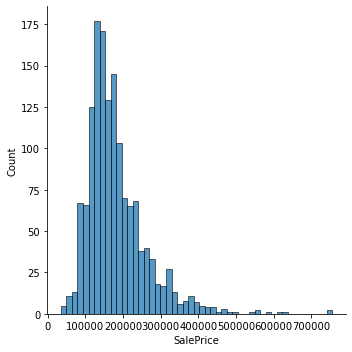

In [92]:
#histogram
sns.displot(fullData2['SalePrice']);

* Average sale price is almost 181k, with a considerable St. Deviation of almost 80k
* Price is positively skewed, and is not aligned to normal distribution ("bell-shaped" curve)

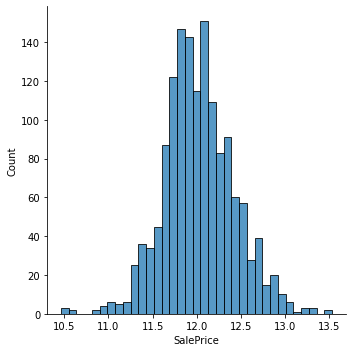

<Figure size 432x288 with 0 Axes>

In [93]:
#convert Sale Price to normal distribution
fullData2['SalePrice'] = np.log(fullData2['SalePrice'])

#transformed histogram and normal probability plot
sns.displot(fullData2['SalePrice']);
fig = plt.figure()

In [98]:
# check correlations with Sale Price - what is influencing it the most?
fullData.corr()['SalePrice'].sort_values(ascending = True)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334544
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.469056
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [119]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Columns affecting SalePrice the most:
* OverallQual (object)
* GrLivArea (int64)
* GarageCars (float64)
* GarageArea (float64)
* TotalBsmtSF (float64)
* 1stFlrSF (int64)
* FullBath (int64)
* TotRmsAbvGrd (int64)
* YearBuilt (int64)
* YearRemodAdd (int64)

### <span style='background :yellow' > 6. Scale

In [116]:
fullData3 = fullData2.copy()

In [117]:
scaler = StandardScaler()
scaler.fit(fullData3)

fullData3 = pd.DataFrame(scaler.transform(fullData3), index=fullData3.index, columns=fullData3.columns)

### <span style='background :yellow' > 6. Multi Linear Regression

In [118]:

# create X and y with the most important columns
super_cols = ['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
X_super = fullData3[super_cols]
y_super = fullData3.SalePrice

# instantiate and fit 
multiple_linreg = LinearRegression()
multiple_linreg.fit(X_super, y_super)

coeffs = multiple_linreg.coef_
intercept =  multiple_linreg.intercept_

# print the coefficients
print(intercept)
print(coeffs)



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').